In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import galsim
import lsst.geom as geom
import numpy as np
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig
import pytest

import xlens

config = RingsSkyMapConfig()
config.patchInnerDimensions = [41, 41]
config.tractOverlap = 0.0
config.patchBorder = 0        # pixels
config.numRings = 8000
config.pixelScale = 0.2
config.projection = "TAN"
# build it
skymap0 = RingsSkyMap(config=config)

In [2]:
from xlens.simulator.catalog import CatalogShearTask, CatalogShearTaskConfig
from xlens.simulator.sim import (
    IASimConfig,
    IASimTask,
    MultibandSimConfig,
    MultibandSimTask,
)

tract_info = skymap0[0]

catalog_config = CatalogShearTaskConfig()
catalog_config.mode = 2
catalog_config.test_value = 0.0
catalog_task = CatalogShearTask(config=catalog_config)
truth_catalog = catalog_task.run(tract_info=tract_info, seed=0).truthCatalog

multiband_config = MultibandSimConfig()
multiband_config.use_mog = False
multiband_task = MultibandSimTask(config=multiband_config)
multiband_output = multiband_task.run(
    tract_info=tract_info,
    patch_id=0,
    band="i",
    seed=0,
    truthCatalog=truth_catalog,
)

ia_config = IASimConfig()
ia_config.use_mog = False
ia_config.ia_amplitude = 0.0
ia_task = IASimTask(config=ia_config)
ia_output = ia_task.run(
    tract_info=tract_info,
    patch_id=0,
    band="i",
    seed=0,
    truthCatalog=truth_catalog,
)

multiband_image = multiband_output.simExposure.image.array
ia_image = ia_output.simExposure.image.array

diff = np.abs(multiband_image - ia_image)
baseline = np.max(np.abs(multiband_image))

/sdf/home/x/xiangchl/.conda/envs/image/lib/python3.11/site-packages/batsim/transforms.py:158: RuntimeWarning: divide by zero encountered in divide
  rwf = (radial_dist) / self.hlr
/sdf/home/x/xiangchl/.conda/envs/image/lib/python3.11/site-packages/batsim/transforms.py:158: RuntimeWarning: invalid value encountered in divide
  rwf = (radial_dist) / self.hlr


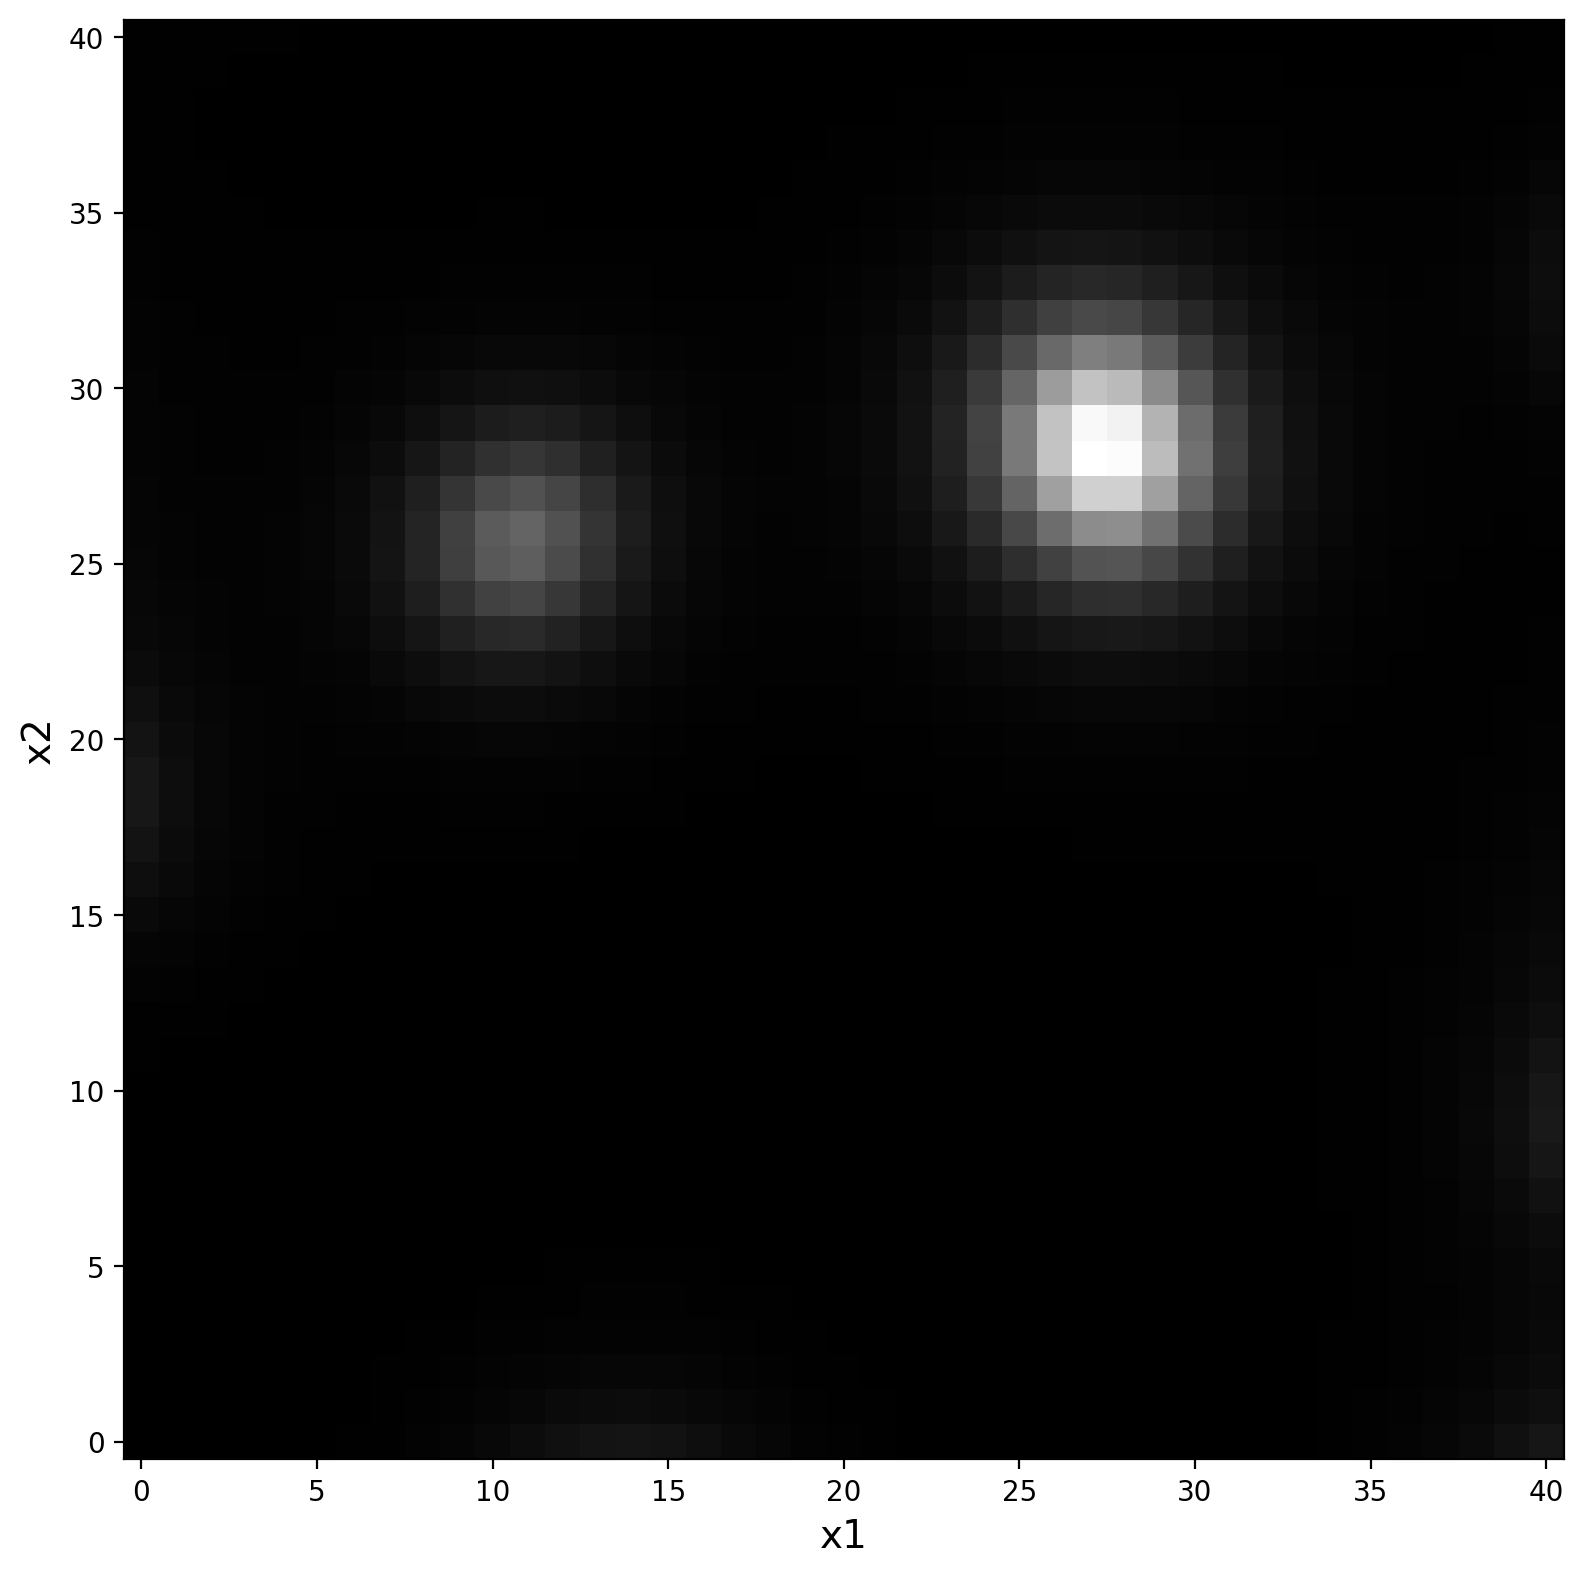

In [9]:
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt

interval = ZScaleInterval()
vmin, vmax = interval.get_limits(multiband_image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(multiband_image, origin='lower', cmap='gray')
ax.set_xlabel("x1", fontsize=14)
ax.set_ylabel("x2", fontsize=14)

plt.tight_layout()
plt.show()

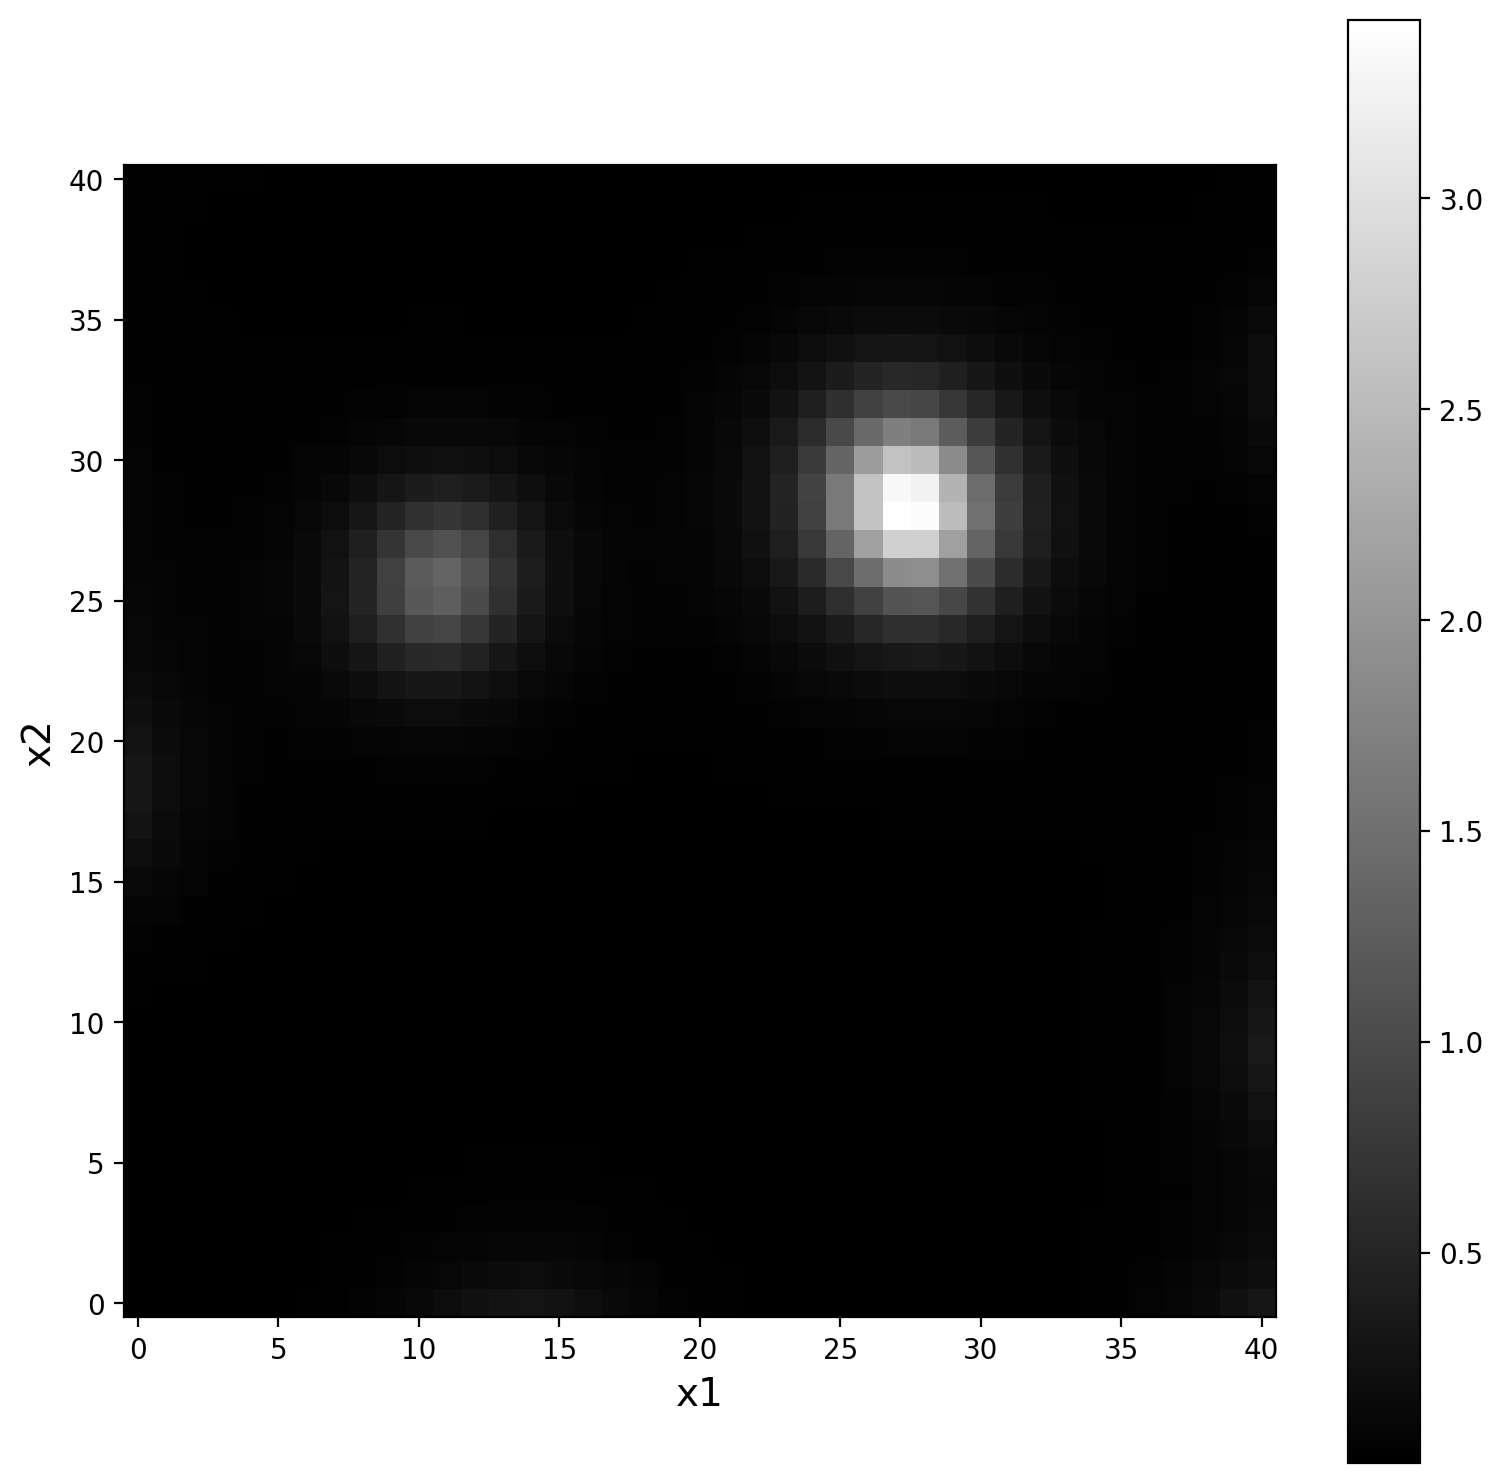

In [14]:
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(ia_image)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(multiband_image, origin='lower', cmap='gray')
ax.set_xlabel("x1", fontsize=14)
ax.set_ylabel("x2", fontsize=14)

plt.tight_layout()
plt.colorbar(im)
plt.show()

In [5]:
np.sum(multiband_image)

198.98445

In [6]:
np.max(multiband_image - ia_image) / np.max(multiband_image)

0.0020336353

In [7]:
np.sum(ia_image)

199.93654

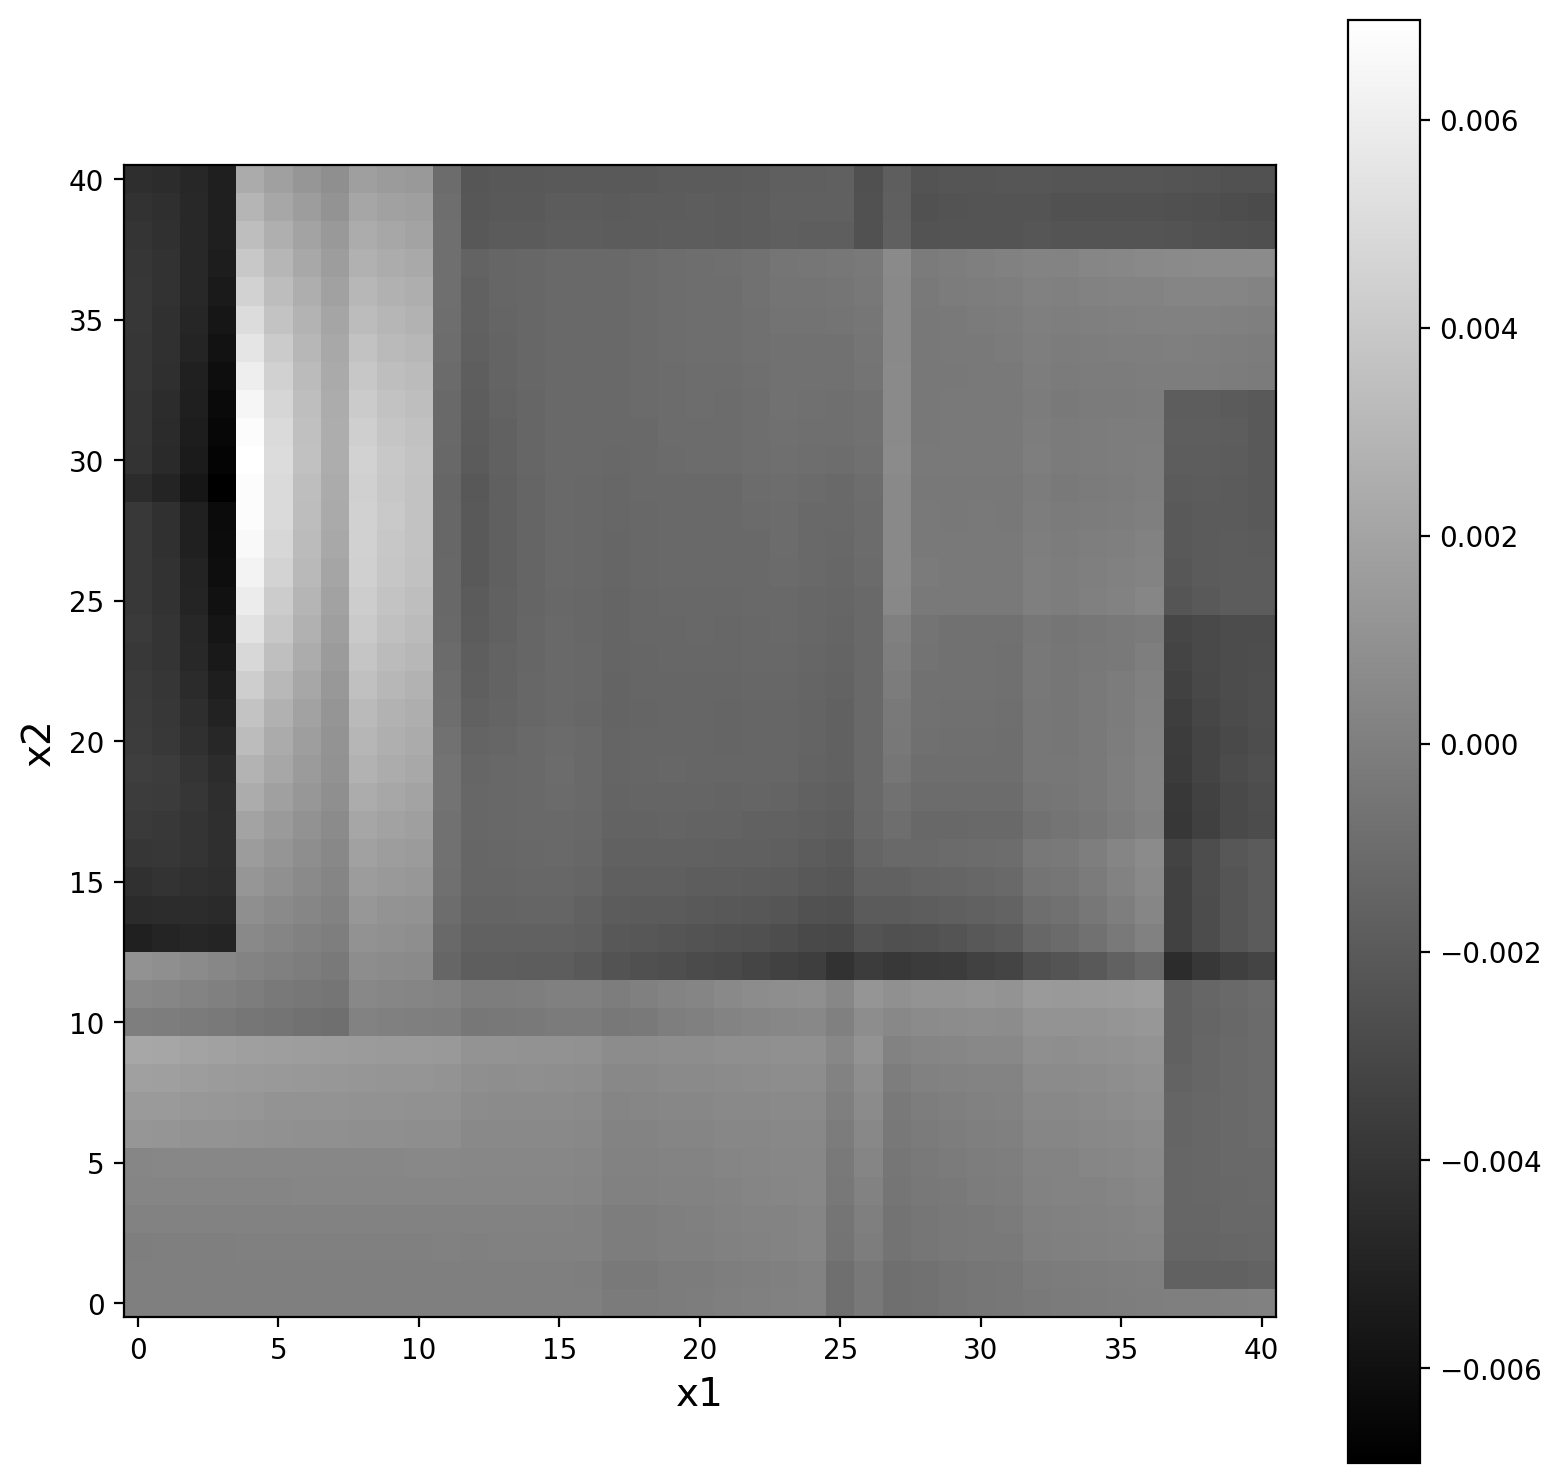

In [13]:
image = multiband_image - ia_image
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
im=ax.imshow(image, origin='lower', cmap='gray')
ax.set_xlabel("x1", fontsize=14)
ax.set_ylabel("x2", fontsize=14)

plt.tight_layout()
plt.colorbar(im)
plt.show()